<a href="https://colab.research.google.com/github/akshatamadavi/data_mining/blob/main/clustering/03_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part C: Gaussian Mixture Models (GMM) Clustering

This notebook implements Gaussian Mixture Models clustering using sklearn. GMM is a probabilistic model that assumes data is generated from a mixture of Gaussian distributions with unknown parameters.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 1. Generate Synthetic Data

Let's create data with overlapping Gaussian distributions - ideal for demonstrating GMM's strengths.

Dataset shape: (300, 2)
Number of true clusters: 4


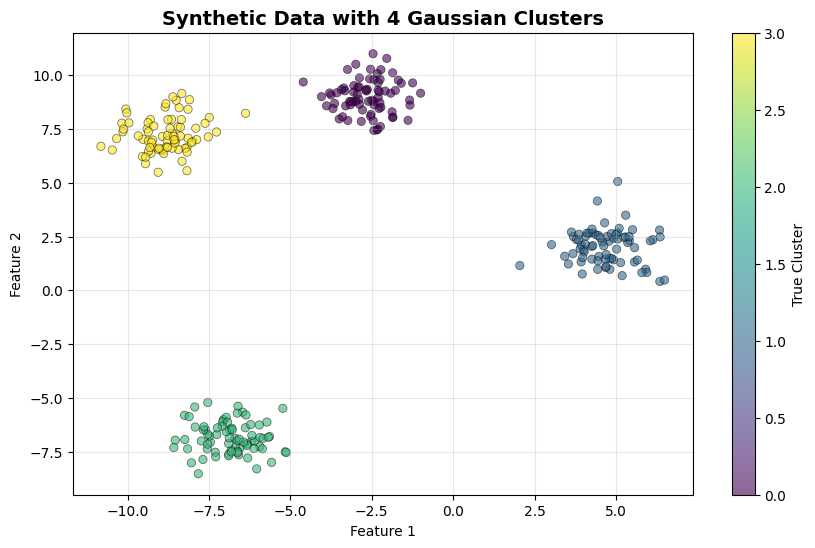

In [ ]:
# Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                       cluster_std=0.8, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Number of true clusters: {len(np.unique(y_true))}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
plt.title('Synthetic Data with 4 Gaussian Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Cluster')
plt.grid(True, alpha=0.3)
plt.show()

## 2. Gaussian Mixture Model Clustering

Apply GMM with different covariance types and analyze the results.

In [ ]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(X)
labels_gmm = gmm.predict(X)
probs = gmm.predict_proba(X)

print(f"Converged: {gmm.converged_}")
print(f"Number of iterations: {gmm.n_iter_}")
print(f"Log-likelihood: {gmm.score(X):.2f}")
print(f"AIC: {gmm.aic(X):.2f}")
print(f"BIC: {gmm.bic(X):.2f}")
print(f"\nMeans of each component:")
for i, mean in enumerate(gmm.means_):
    print(f"  Component {i}: [{mean[0]:.2f}, {mean[1]:.2f}]")

Converged: True
Number of iterations: 2
Log-likelihood: -3.71
AIC: 2272.32
BIC: 2357.51

Means of each component:
  Component 0: [-2.64, 8.99]
  Component 1: [-6.84, -6.84]
  Component 2: [4.70, 2.03]
  Component 3: [-8.83, 7.22]


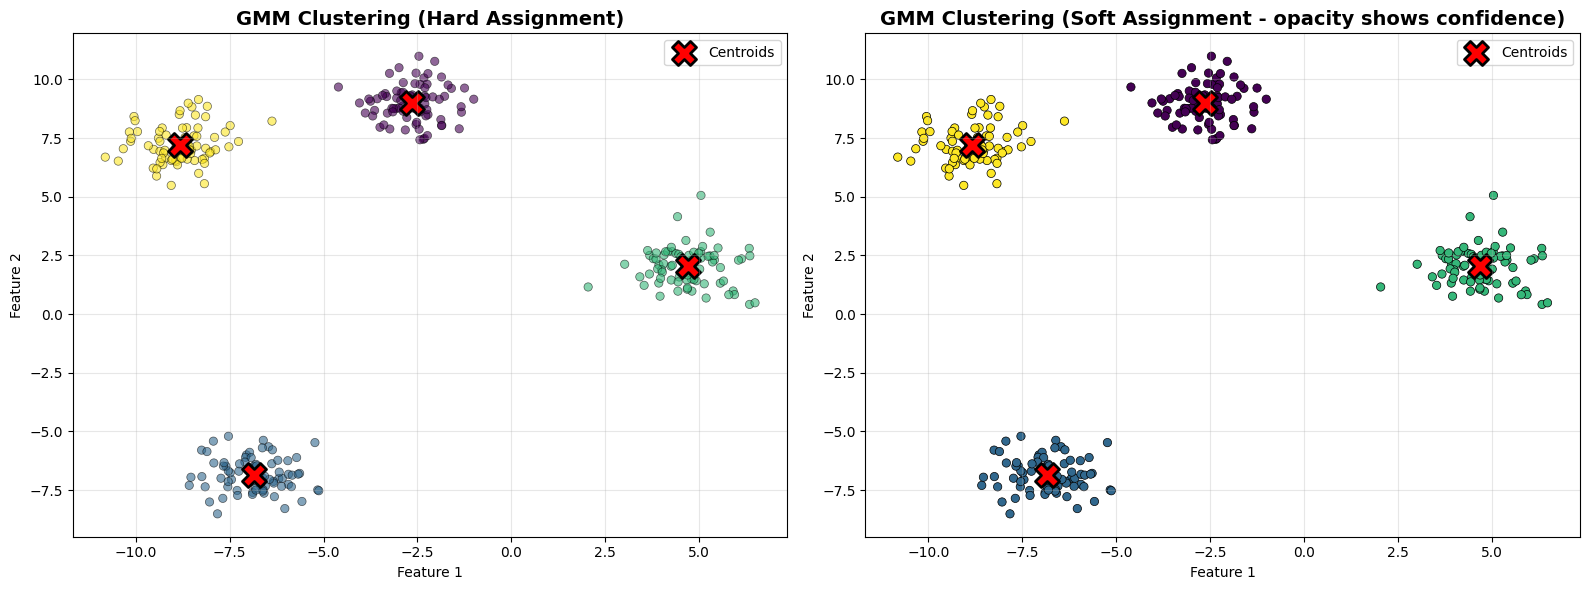

✓ GMM clustering visualized!


In [ ]:
# Visualize GMM clustering results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Hard clustering (predicted labels)
ax1.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='X', s=300, c='red',
           edgecolors='black', linewidths=2, label='Centroids')
ax1.set_title('GMM Clustering (Hard Assignment)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Soft clustering (probability-based)
max_probs = probs.max(axis=1)
ax2.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', alpha=max_probs,
           edgecolors='black', linewidth=0.5)
ax2.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='X', s=300, c='red',
           edgecolors='black', linewidths=2, label='Centroids')
ax2.set_title('GMM Clustering (Soft Assignment - opacity shows confidence)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ GMM clustering visualized!")